In [1]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plotly.tools.set_credentials_file(username='cclipp', api_key='PXEF8jIWI8E52Cst97E4')

In [2]:
try:
    df = pd.read_csv(r'D:\uci_data\donorschoose-application-screening\train\train.csv')
except:
    df = pd.read_csv(r'H:\uci_data\donorschoose-application-screening\train\train.csv')
    

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

,teacher_number_of_previously_posted_projects,project_is_approved
count,154346.000000,154346.0
mean,12.015867,1.0
std,29.423888,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,2.000000,1.0
75%,9.000000,1.0
max,451.000000,1.0


In [92]:
df["project_subject_categories"].value_counts()

Literacy & Language                           39257
Math & Science                                28555
Literacy & Language, Math & Science           24499
Health & Sports                               16951
Music & The Arts                               8527
Special Needs                                  7065
Literacy & Language, Special Needs             6685
Applied Learning                               6310
Math & Science, Literacy & Language            3843
Applied Learning, Literacy & Language          3725
History & Civics                               3065
Math & Science, Special Needs                  3010
Literacy & Language, Music & The Arts          2878
Math & Science, Music & The Arts               2761
Applied Learning, Special Needs                2481
Health & Sports, Special Needs                 2368
History & Civics, Literacy & Language          2288
Warmth, Care & Hunger                          2191
Math & Science, Applied Learning               2071
Applied Lear

In [97]:
dummies = pd.get_dummies(df[["project_grade_category", 'project_subject_categories']], prefix='dum')

In [98]:
pd.concat([dummies, df], axis=1).corr().to_csv('correlations.csv')

In [5]:
df['project_title_wc'] = df['project_title'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_1_wc'] = df['project_essay_1'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_2_wc'] = df['project_essay_2'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_3_wc'] = df['project_essay_3'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_4_wc'] = df['project_essay_4'].apply(lambda x: len(str(x).split(' ')))
df['total_essay_wc'] = df['project_essay_1_wc'] + df['project_essay_2_wc'] + df['project_essay_3_wc'] + df['project_essay_4_wc']
subdf = df[['project_submitted_datetime','school_state', 'project_grade_category', 'project_is_approved','teacher_number_of_previously_posted_projects',
            'project_title', 'project_title_wc', 'total_essay_wc']]
subdf.columns = ['project_submitted_datetime','state', 'category',
                 'approve', 'projects', 'project_title', 'project_title_wc', 'total_essay_wc']


In [6]:
df[df['project_is_approved'] ==1].describe()

,teacher_number_of_previously_posted_projects,project_is_approved,project_title_wc,project_essay_1_wc,project_essay_2_wc,project_essay_3_wc,project_essay_4_wc,total_essay_wc
count,154346.000000,154346.0,154346.000000,154346.000000,154346.000000,154346.000000,154346.000000,154346.000000
mean,12.015867,1.0,5.185842,113.467184,143.225837,4.511507,3.176448,264.380975
std,29.423888,0.0,2.149294,35.830750,51.855455,19.643241,11.755299,68.871846
min,0.000000,1.0,1.000000,7.000000,36.000000,1.000000,1.000000,123.000000
25%,0.000000,1.0,4.000000,88.000000,108.000000,1.000000,1.000000,211.000000
50%,2.000000,1.0,5.000000,103.000000,125.000000,1.000000,1.000000,246.000000
75%,9.000000,1.0,7.000000,134.000000,164.000000,1.000000,1.000000,302.000000
max,451.000000,1.0,58.000000,484.000000,4660.000000,294.000000,190.000000,4744.000000


In [82]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 8 columns):
project_submitted_datetime    182080 non-null object
state                         182080 non-null object
category                      182080 non-null object
approve                       182080 non-null int64
projects                      182080 non-null int64
project_title                 182080 non-null object
project_title_wc              182080 non-null int64
total_essay_wc                182080 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.1+ MB


In [83]:
subdf.describe()
subdf.to_csv('../static/data/train_data.csv')

In [84]:
census_data = pd.read_csv(r'C:\Users\corey\Dropbox\uci\Homework\16-D3\data\census_data.csv', index_col='locationAbbr')

census_data = census_data[['medianIncomeAll','estimateTotalHouseholds','Uninsured Population; Estimate; In labor force']]
census_data.columns = ['medianIncome', 'totalHouseholds', 'uninsured']

In [85]:
costs_state = pd.read_csv(r'H:\uci_data\donorschoose-application-screening\mean_by_state.csv', index_col='school_state')

costs_state.head()

costs_state

,teacher_number_of_previously_posted_projects,project_is_approved,items,quantity,price,total_price,min_quantity,min_price,min_total_price,max_quantity,max_price,max_total_price,mean_quantity,mean_price,mean_total_price,std_quantity,std_price,std_total_price
school_state,,,,,,,,,,,,,,,,,,
AK,19.454219,0.849192,7.886894,21.545781,330.662567,611.027810,3.725314,74.834829,180.061759,8.786355,172.356158,356.457935,5.265453,108.575401,242.605322,2.282338,44.889385,84.597218
AL,8.046024,0.848393,4.853807,12.626734,306.298931,550.436315,3.520135,100.046653,207.991499,5.957699,199.180596,383.215283,4.372213,137.119237,276.714347,1.190486,51.202198,95.301657
AR,10.603870,0.832100,6.103017,17.130905,280.099579,493.755959,3.908936,87.189425,183.084121,7.763802,171.625999,320.644530,5.104961,117.475445,233.704458,1.746107,41.654181,68.698790
AZ,6.970946,0.841727,5.440509,18.863033,252.878888,503.763688,5.172108,77.110908,188.118821,9.482844,150.902147,327.626674,6.609664,104.455017,243.025842,2.014503,36.591479,73.155095
CA,16.248375,0.856431,5.996342,17.856237,322.900597,582.575217,4.250360,101.973805,214.767955,8.067562,199.695118,382.242994,5.466545,136.248424,276.908348,1.718883,47.364202,84.858775
CO,7.445681,0.845787,5.861155,17.171701,258.924213,551.128479,4.794383,87.153174,231.545294,8.055644,153.388108,370.842056,5.921668,112.829040,286.849762,1.568273,33.989798,73.990789
CT,13.059291,0.871294,5.811280,18.223427,309.355644,567.685879,4.525307,95.975954,210.424064,8.445047,193.535242,376.352910,5.766405,131.304916,272.509748,1.791870,48.962418,85.926605
DC,11.886918,0.812639,7.041020,19.808204,349.266286,684.154933,3.708426,79.906530,199.626009,8.175166,187.024812,425.739545,5.033218,117.876982,280.579223,1.942111,50.666393,110.945961
DE,19.149406,0.891341,5.461800,13.903226,227.779474,407.906299,3.624788,69.296146,152.179202,6.650255,135.684007,267.312649,4.584235,94.329958,196.819577,1.419705,32.555056,59.381260


In [86]:
subdf = pd.concat([subdf.groupby('state').mean(), census_data, costs_state['total_price']], axis=1).drop('GU')
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AK to WY
Data columns (total 8 columns):
approve             51 non-null float64
projects            51 non-null float64
project_title_wc    51 non-null float64
total_essay_wc      51 non-null float64
medianIncome        51 non-null int64
totalHouseholds     51 non-null int64
uninsured           48 non-null float64
total_price         51 non-null float64
dtypes: float64(6), int64(2)
memory usage: 3.6+ KB


In [87]:
subdf.reset_index().to_csv('../static/data/census_data.csv', index=False)

In [91]:
subdf[subdf['approve' == 1]].describe()

KeyError: False

In [25]:
sns.boxplot??

## Word Cloud

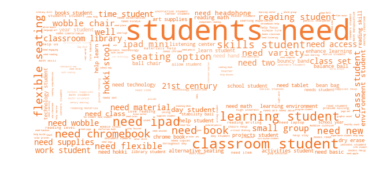

In [31]:
import re
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

temp_data = df.dropna(subset=['project_resource_summary'])
# converting into lowercase
temp_data['project_resource_summary'] = temp_data['project_resource_summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['project_resource_summary'] = temp_data['project_resource_summary'].map(text_prepare)



from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

donorsChoose = np.array(Image.open("logo.png"))
stopwords = set(STOPWORDS)
stopwords.add("need")


image_colors = ImageColorGenerator(donorsChoose)

wc = WordCloud(max_font_size=50, width=1200, height=900,
                      background_color="white", mask=donorsChoose).generate(' '.join(temp_data['project_resource_summary'].values))
# show
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('resource_wordcloud.jpg', bbox_inches='tight')
plt.figure()
#plt.show()

In [10]:
ImageColorGenerator??

Init signature: ImageColorGenerator(image, default_color=None)
Source:        
class ImageColorGenerator(object):
    """Color generator based on a color image.

    Generates colors based on an RGB image. A word will be colored using
    the mean color of the enclosing rectangle in the color image.

    After construction, the object acts as a callable that can be passed as
    color_func to the word cloud constructor or to the recolor method.

    Parameters
    ----------
    image : nd-array, shape (height, width, 3)
        Image to use to generate word colors. Alpha channels are ignored.
        This should be the same size as the canvas. for the wordcloud.
    default_color : tuple or None, default=None
        Fallback colour to use if the canvas is larger than the image,
        in the format (r, g, b). If None, raise ValueError instead.
    """
    # returns the average color of the image in that region
    def __init__(self, image, default_color=None):
        if image.ndim 